<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/fastai_scratch_with_GPU_mnist_4_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    832      0 --:--:-- --:--:-- --:--:--   832
Updating fastai...
Done.


In [ ]:
!pip freeze | grep torchvision

torchvision==0.6.1+cu101


In [ ]:
!pip install fastcore --upgrade

In [ ]:
!pip install fastai2 --upgrade

     |████████████████████████████████| 194kB 6.8MB/s 


In [ ]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.61)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My\ Drive/course-v4/
!pwd

/content/drive/My Drive/course-v4
/content/drive/My Drive/course-v4


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 18.7MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 2.7MB 40.9MB/s 


In [ ]:
%cd nbs

/content/drive/My Drive/course-v4/nbs


In [ ]:
!pwd

/content/drive/My Drive/course-v4/nbs


### Start of import libraries

In [ ]:
from fastai2.vision.all import *

In [ ]:
from utils import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]


### Datablock

In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=Resize(28),
    batch_tfms=[])


Setting-up type transforms pipelines
Found 14434 items
2 datasets of sizes 12396,2038
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_sample/train/7/56052.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_sample/train/7/56052.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=28x28, TensorCategory(1))
    applying Resize gives
      (PILImageBW mode=L size=28x28

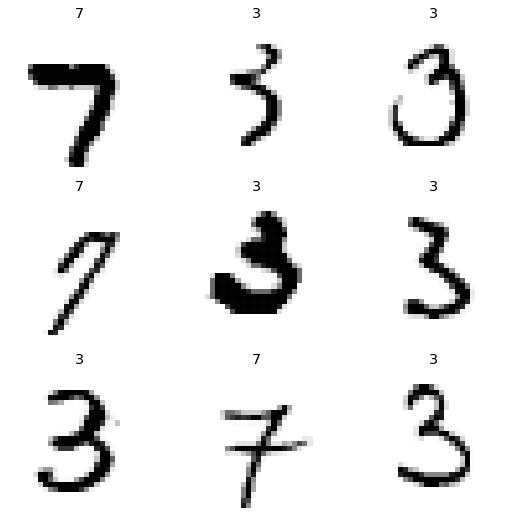

In [ ]:
datablock.summary(path,bs=256, show_batch=True)

In [ ]:
dls = datablock.dataloaders(path, bs=256)

In [ ]:
xb,yb = dls.one_batch()

In [ ]:
xb.device

device(type='cuda', index=0)

In [ ]:
cpu_dls = dls.to('cpu')

In [ ]:
xbc, ybc = cpu_dls.one_batch()

In [ ]:
xbc.device

device(type='cpu')